In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import json
from numpy import linalg as LA
import tensorflow as tf
import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'binary_inputs'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 
sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools

In [5]:
data_folder = 'code/multitask-nets/'+net+'/data/'
rnn_type = 'LeakyRNN'
activation = 'softplus'
init = 'randgauss'
seed = '0'
n_rnn = str(256)
l2w = -6
l2h = -6
l1w = 0
l1h = 0
lr = -7
rule_trains = ['fdgo','delaygo','fdanti','delayanti']

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt


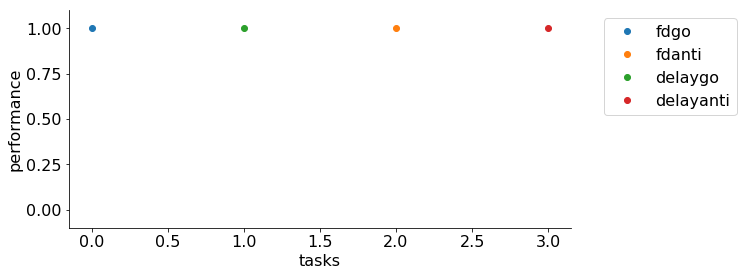

In [6]:
seed = str(1)
s = '_'
rule_trains_str = s.join(rule_trains)
net_name = 'lr'+"{:.1f}".format(-lr)+'l2_w'+"{:.1f}".format(-l2w)+'_h'+"{:.1f}".format(-l2h)+'_'+rule_trains_str
net_name = 'l2_w6_h6_fdgo_fdanti_delaygo_delayanti'

m = os.path.join(p,data_folder,rnn_type,activation,init,
                          str(len(rule_trains))+'_tasks',str(n_rnn)+'_n_rnn',net_name,seed)

fig = plt.figure(figsize=(9, 4))
plt.rcParams.update({'font.size': 16})
ax = plt.subplot(111)

model = Model(m)
with tf.Session() as sess:
    model.restore()
    var_list = model.var_list
    params = [sess.run(var) for var in var_list]
    hparams = model.hp
    for rule in hparams['rule_trains']:
        trial = generate_trials(rule, hparams, mode='random', noise_on=False, batch_size = 128*16)
        feed_dict = tools.gen_feed_dict(model, trial, hparams)
        h_tf, y_hat_tf = sess.run([model.h, model.y_hat], feed_dict=feed_dict) #(n_time, n_condition, n_neuron)
        perf = get_perf(y_hat_tf,trial.y_loc)
        plt.plot(np.where(trial.x[0,0,hparams['rule_start']:]), np.mean(perf),'o',label = rule)
#             plt.text(np.where(trial.x[0,0,5:]), np.mean(perf),rule,rotation = 45)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylim((-0.1,1.1))
plt.xlabel('tasks')
plt.ylabel('performance')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [7]:
hparams

{u'activation': u'softplus',
 u'alpha': 0.2,
 u'batch_size_test': 8192,
 u'batch_size_train': 64,
 u'c_intsyn': 0,
 u'dt': 20,
 u'in_type': u'normal',
 u'ksi_intsyn': 0,
 u'l1_h': 0,
 u'l1_weight': 0,
 u'l2_h': 1e-06,
 u'l2_weight': 1e-06,
 u'l2_weight_init': 0,
 u'learning_rate': 0.001,
 u'loss_type': u'lsq',
 u'n_eachring': 2,
 u'n_input': 7,
 u'n_output': 3,
 u'n_rep': 256,
 u'n_rnn': 256,
 u'n_rule': 4,
 u'num_ring': 1,
 u'optimizer': u'adam',
 u'p_weight_train': None,
 'rng': <mtrand.RandomState at 0x7ff69468e690>,
 u'rnn_type': u'LeakyRNN',
 u'rule_probs': [0.25, 0.25, 0.25, 0.25],
 u'rule_start': 3,
 u'rule_trains': [u'fdgo', u'fdanti', u'delaygo', u'delayanti'],
 u'rules': [u'fdgo', u'fdanti', u'delaygo', u'delayanti'],
 u'ruleset': u'basic',
 u'save_name': u'test',
 u'seed': 1,
 u'sigma_rec': 0.05,
 u'sigma_x': 0.1,
 u'target_cost': 0,
 u'target_perf': 1.0,
 u'tau': 100,
 u'use_separate_input': False,
 u'w_rec_init': u'randgauss'}

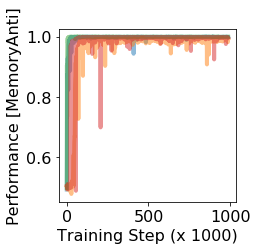

In [8]:
fig = plt.figure(figsize=(7, 7))
plt.rcParams.update({'font.size': 16})
ax_perf = plt.subplot(2,2,1)

fname = os.path.join(m, 'log.json')
with open(fname, 'r') as f:
    log_post = json.load(f)
for r in range(len(rule_trains)):

    plt.sca(ax_perf)
    x = log_post['perf_'+rule_trains[r]]
    plt.plot(x,'-',alpha = .5,linewidth = 4,label = rule)
    ax_perf.set_xlabel('Training Step (x 1000)')
    ax_perf.set_ylabel('Performance [MemoryAnti]')
        

In [18]:
hparams

{u'activation': u'softplus',
 u'alpha': 0.2,
 u'batch_size_test': 8192,
 u'batch_size_train': 64,
 u'c_intsyn': 0,
 u'dt': 20,
 u'in_type': u'normal',
 u'ksi_intsyn': 0,
 u'l1_h': 0,
 u'l1_weight': 0,
 u'l2_h': 1e-06,
 u'l2_weight': 1e-06,
 u'l2_weight_init': 0,
 u'learning_rate': 0.001,
 u'loss_type': u'lsq',
 u'n_eachring': 2,
 u'n_input': 7,
 u'n_output': 3,
 u'n_rep': 256,
 u'n_rnn': 256,
 u'n_rule': 4,
 u'num_ring': 1,
 u'optimizer': u'adam',
 u'p_weight_train': None,
 'rng': <mtrand.RandomState at 0x7ff69468e690>,
 u'rnn_type': u'LeakyRNN',
 u'rule_probs': [0.25, 0.25, 0.25, 0.25],
 u'rule_start': 3,
 u'rule_trains': [u'fdgo', u'fdanti', u'delaygo', u'delayanti'],
 u'rules': [u'fdgo', u'fdanti', u'delaygo', u'delayanti'],
 u'ruleset': u'basic',
 u'save_name': u'test',
 u'seed': 1,
 u'sigma_rec': 0.05,
 u'sigma_x': 0.1,
 u'target_cost': 0,
 u'target_perf': 1.0,
 u'tau': 100,
 u'use_separate_input': False,
 u'w_rec_init': u'randgauss'}

In [9]:
def plot_N(X, D, clist, linewidth = 1, alpha = .5, linestyle = '-', cmap_c = 'hsv',markersize = 10):
    """Plot activity is some 2D space.

        Args:
            X: neural activity in Trials x Time x Neurons
            D: Neurons x 2 plotting dims
        """

    cmap=plt.get_cmap(cmap_c)
    S = np.shape(X)[0]
    
    for s in range(S):

        if len(clist)==1:
            c = clist[0]
        else:
            c = cmap(clist[s]/max(clist))

        X_trial = np.dot(X[s,:,:],D.T)
        plt.plot(X_trial[-1,0],X_trial[-1,1],'^',c = c, linewidth = linewidth, alpha = alpha, markersize = markersize)
        plt.plot(X_trial[:,0],X_trial[:,1],linestyle,c = c, linewidth = linewidth, alpha = alpha, markersize = markersize)
        plt.plot(X_trial[0,0],X_trial[0,1],'x',c = c, linewidth = linewidth, alpha = alpha,markersize = markersize)

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dty

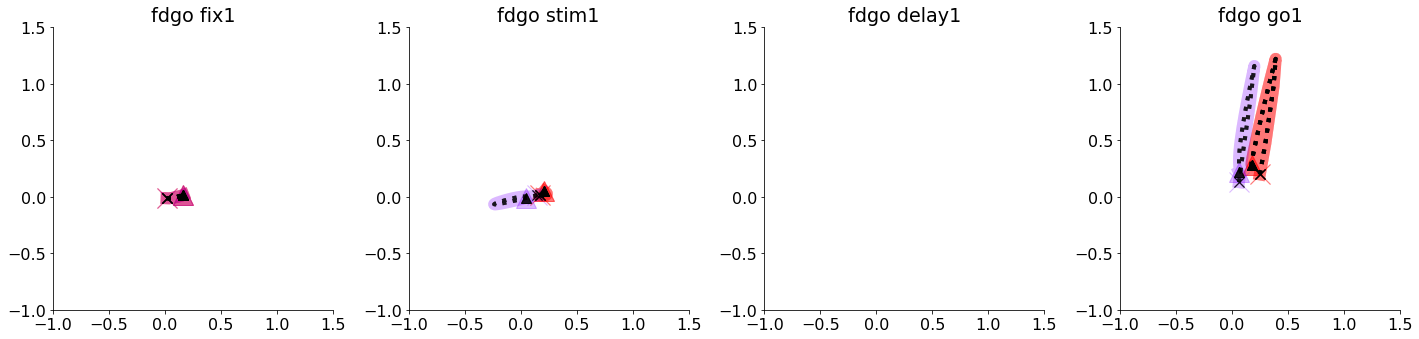

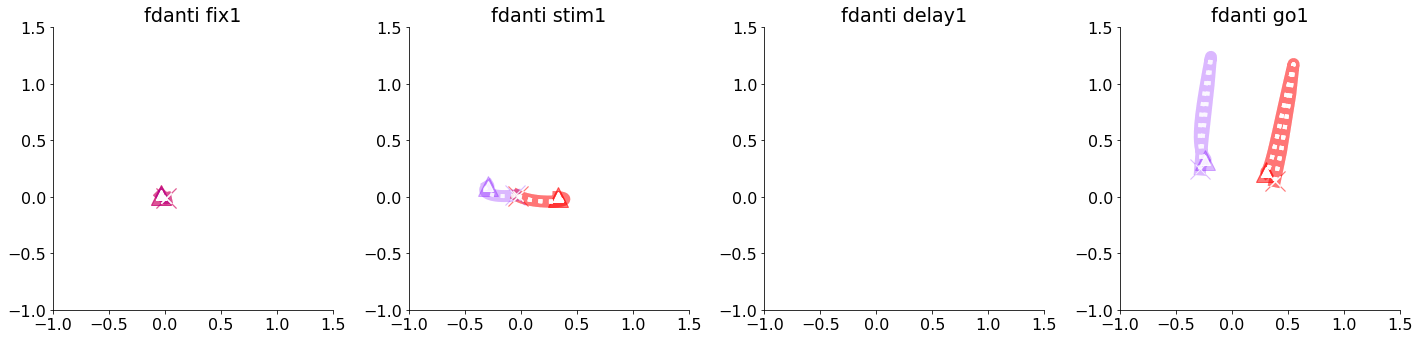

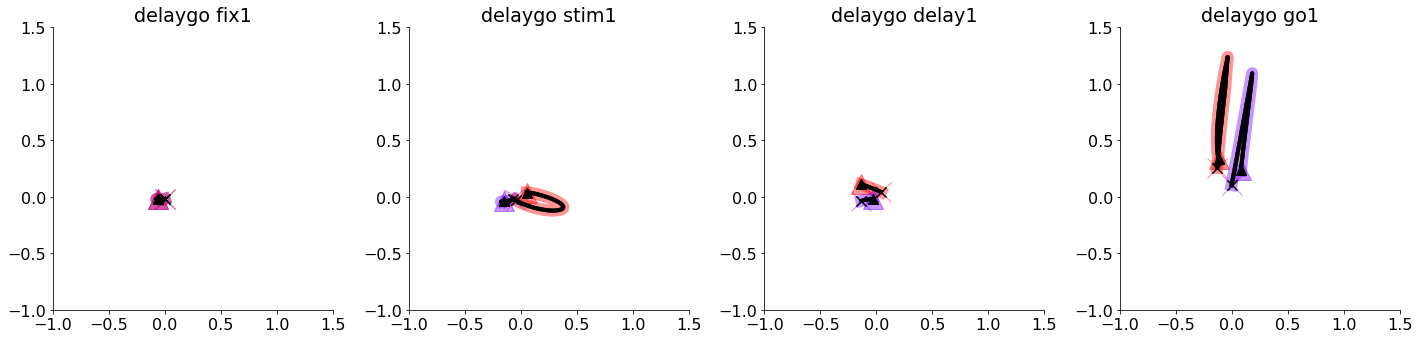

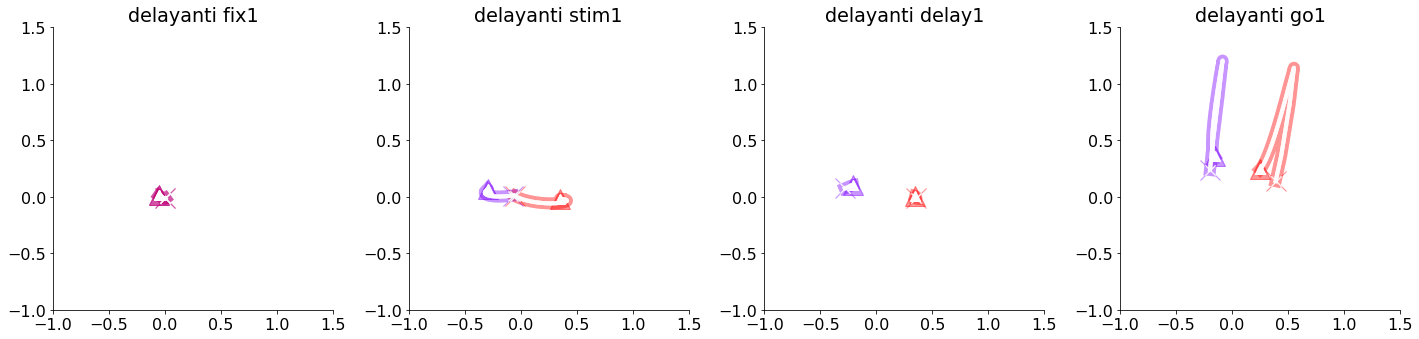

In [20]:
from tools_lnd import get_T_inds
from tools_lnd import gen_trials_from_model_dir, gen_X_from_model_dir_epoch, gen_X_from_model_dir
from sklearn.decomposition import PCA

n_components = 200
trial = gen_trials_from_model_dir(m,'delayanti',mode='random',noise_on = False)
X, _ = gen_X_from_model_dir(m,trial)
pca = PCA(n_components = n_components)
fp_pca = pca.fit_transform(X.T)
D_use = pca.components_.T

# w_in, b_in, w_out, b_out = get_model_params(m)
# D_use = w_out[:,1:]

epoch_set = ['fix1','stim1','delay1','go1']#trial.epochs.keys()
cmap_discrete = ['k','w','k','w']
line_width_set = [':',':','-','-']

# fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')
for ri in range(len(hparams['rule_trains'])):
    fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')
    
    
    rule = hparams['rule_trains'][ri]
    trial = gen_trials_from_model_dir(m,rule,mode='random',noise_on = False)
    _,x = gen_X_from_model_dir(m,trial)
    
    
    for ei in range(len(epoch_set)):
        ax = plt.subplot(1,len(epoch_set),1+ei)
        if epoch_set[ei]=='delay1':
            if 'delay' in rule:
                contin = 1
            else:
                contin = 0
        else:
            contin = 1
            
        if contin == 1:
        
            ax = plt.subplot(1,len(epoch_set),1+ei)

            T_inds = get_T_inds(trial,epoch_set[ei])
            x_epoch = np.transpose(x[:,:,(T_inds[0]):T_inds[-1]],(1,2,0))
            trial_set = range(0,np.shape(trial.x)[1],int(np.shape(trial.x)[1]/10))

            plot_N(x_epoch[trial_set,:,:],D_use.T,trial.stim_locs[trial_set,np.argmin(trial.stim_locs[0,:])],
                   linewidth = 12,linestyle = '-', alpha = .1, markersize = 20, cmap_c = 'rainbow')
            plot_N(x_epoch[trial_set,:,:],D_use.T,cmap_discrete[ri],linewidth = 4, 
                   linestyle = line_width_set[ri], alpha = .5, markersize = 10)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.title(rule+' '+epoch_set[ei])
        plt.xlim([-1,1.5])
        plt.ylim([-1,1.5])

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/code/multitask-nets/binary_inputs/data/LeakyRNN/softplus/randgauss/4_tasks/256_n_rnn/l2_w6_h6_fdgo_fdanti_delaygo_delayanti/1/model.ckpt
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(263, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dty

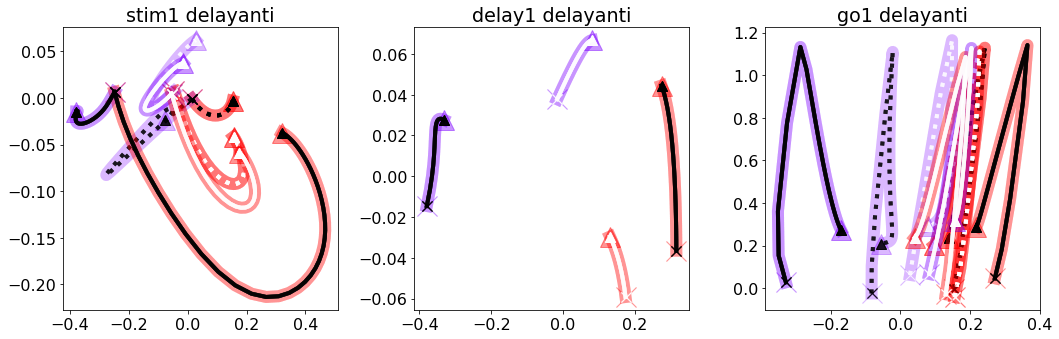

In [22]:
from tools_lnd import get_T_inds
from tools_lnd import gen_trials_from_model_dir, gen_X_from_model_dir_epoch, gen_X_from_model_dir
from sklearn.decomposition import PCA


n_components = 200
trial = gen_trials_from_model_dir(m,'delaygo',mode='random',noise_on = False)
X, _ = gen_X_from_model_dir(m,trial)
pca = PCA(n_components = n_components)
fp_pca = pca.fit_transform(X.T)
D_use = pca.components_.T

# w_in, b_in, w_out, b_out = get_model_params(m)
# D_use = w_out[:,1:]

epoch_set = ['stim1','delay1','go1']#trial.epochs.keys()
cmap_discrete = ['k','w','k','w']
line_width_set = [':',':','-','-']

fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')
for ri in range(len(hparams['rule_trains'])):
#     fig = plt.figure(figsize=(len(epoch_set)*5,5),tight_layout=True,facecolor='white')
    
    
    rule = hparams['rule_trains'][ri]
    trial = gen_trials_from_model_dir(m,rule,mode='random',noise_on = False)
    _,x = gen_X_from_model_dir(m,trial)
    
    for ei in range(len(epoch_set)):
        ax = plt.subplot(1,len(epoch_set),1+ei)
        
        if epoch_set[ei]=='delay1':
            if 'delay' in rule:
                contin = 1
            else:
                contin = 0
        else:
            contin = 1
            
        if contin == 1:
        
            ax = plt.subplot(1,len(epoch_set),1+ei)

            T_inds = get_T_inds(trial,epoch_set[ei])
            x_epoch = np.transpose(x[:,:,(T_inds[0]-1):T_inds[-1]],(1,2,0))
            trial_set = range(0,np.shape(trial.x)[1],int(np.shape(trial.x)[1]/10))

            plot_N(x_epoch[trial_set,:,:],D_use.T,trial.stim_locs[trial_set,0],
                   linewidth = 12,linestyle = '-', alpha = .1, markersize = 20, cmap_c = 'rainbow')
            plot_N(x_epoch[trial_set,:,:],D_use.T,cmap_discrete[ri],linewidth = 4, 
                   linestyle = line_width_set[ri], alpha = .5, markersize = 10)

            plt.title(epoch_set[ei]+' '+rule)